# Feature Engineering

Часто признаки надо преобразовать,чтобы они начали нормально работать. Например, нужно превраить качественные признаки в количественные (уровень образования "средняя школа", "бакалавриат", "магистратура" представить в виде номеров уровней образования, например). Помимо этого, хорошо бы отмасшабировать данные, чтобы разница в несколько порядков не мешала сравнивать их между собой.

Но для начала посморим как лучше заполнять данные на примере датасета с "Титаника". Резюме - лучше заполнить по распределению  (если не надо удалить).

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns

In [129]:
train = pd.read_csv('data/00_titanic_train.csv')

Посмотрим на исходное распределение возрастов и стаитстики спасшихся по классам.

<Axes: xlabel='Age', ylabel='Count'>

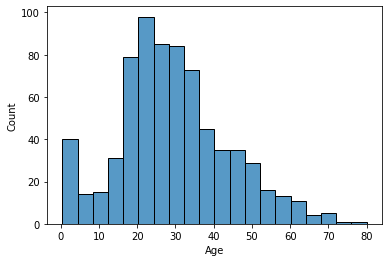

In [130]:
sns.histplot(train['Age'])

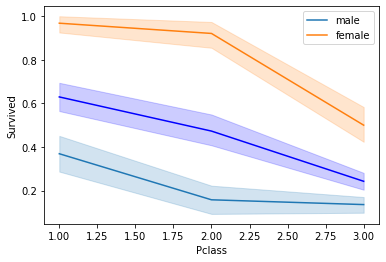

In [131]:
ax_m = sns.lineplot(data=train, x='Pclass', y='Survived', hue='Sex');
sns.lineplot(data=train, x='Pclass', y='Survived', c='b', ax=ax_m);

In [132]:
train[train['Age'].isnull()]

PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
5      male  NaN      0      0      330877   8.4583   NaN        Q  
17     male  NaN      0      0      244373  13.0000   NaN        S  
19   female  NaN      0      0        2649   7.2250   NaN        C  
26     male  NaN      0      0        2631   7.2250   NaN        C  
28   female  NaN      0      0      330959   7.8792   NaN        Q  
..      ...  ...    ...    ...         ...      ...   ...      ...  
859    male  NaN      0      0        2629   7.2292   NaN        C  
863  female  NaN      8      2    CA. 2343  69.5500   NaN        S  
868    male  NaN      0      0      345777   9.5000   NaN        S  
878    male  NaN      0      0      349217   7.8958   NaN        S  
888  female  NaN      1      2  W./C. 6607  23.4500   NaN        S  

[177 rows x 12 columns]

Посмотрим как изменится статистика, если удалить пустые данные.

In [29]:
fill_drop = train.copy()
fill_drop = fill_drop.dropna(subset=['Age'])

<Axes: xlabel='Age', ylabel='Count'>

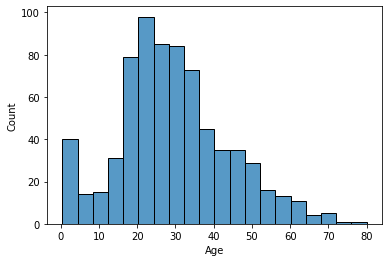

In [31]:
sns.histplot(fill_drop['Age'])

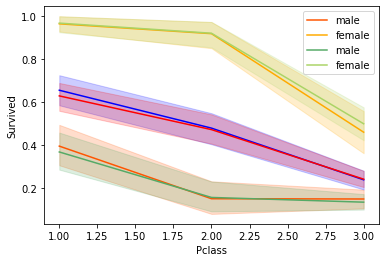

In [44]:
ax_m = sns.lineplot(data=fill_drop, x='Pclass', y='Survived', hue='Sex', palette='autumn');
sns.lineplot(data=train, x='Pclass', y='Survived', hue='Sex', palette='summer', ax=ax_m);
sns.lineplot(data=fill_drop, x='Pclass', y='Survived', c='b', ax=ax_m);
sns.lineplot(data=train, x='Pclass', y='Survived', c='r', ax=ax_m);

Посмотрим что будет если заполнить средним.

In [47]:
fill_mid = train.copy()
fill_mid['Age'] = fill_mid['Age'].fillna(train['Age'].mean())

<Axes: xlabel='Age', ylabel='Count'>

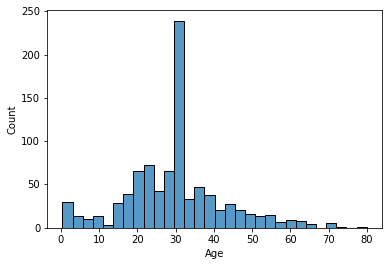

In [49]:
sns.histplot(fill_mid['Age'])

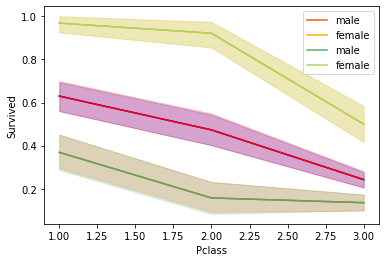

In [50]:
ax_m = sns.lineplot(data=fill_mid, x='Pclass', y='Survived', hue='Sex', palette='autumn');
sns.lineplot(data=train, x='Pclass', y='Survived', hue='Sex', palette='summer', ax=ax_m);
sns.lineplot(data=fill_mid, x='Pclass', y='Survived', c='b', ax=ax_m);
sns.lineplot(data=train, x='Pclass', y='Survived', c='r', ax=ax_m);

Посморим что будет, если заполнить по распределению.

In [84]:
def get_random(hist, bins):
    s = hist.sum()
    n = np.random.randint(0, s)
    bin_no = 0
    while n > hist[bin_no]:
        n -= hist[bin_no]
        bin_no += 1
    return bins[bin_no] + int(np.random.random() * (bins[bin_no + 1] - bins[bin_no]))


In [115]:
(hist, bins) = np.histogram(train['Age'], bins=np.linspace(0, 80, 9))
cnt = [get_random(hist, bins) for i in range(train[train['Age'].isnull()].shape[0])]

In [151]:
fill_stat = train.copy()
fill_stat.loc[fill_stat[fill_stat['Age'].isnull()].index.tolist(), 'Age'] = cnt

<Axes: xlabel='Age', ylabel='Count'>

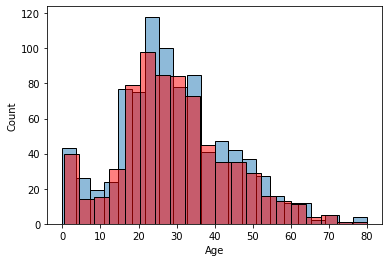

In [152]:
ax_m = sns.histplot(fill_stat['Age'], alpha=0.5)
sns.histplot(train['Age'], color='r', alpha=0.5, ax=ax_m)

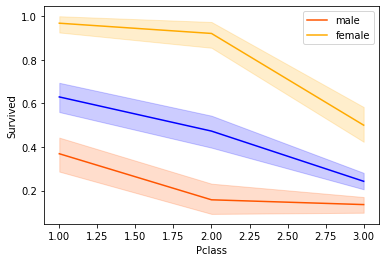

In [153]:
ax_m = sns.lineplot(data=fill_stat, x='Pclass', y='Survived', hue='Sex', palette='autumn');
sns.lineplot(data=fill_stat, x='Pclass', y='Survived', c='b', ax=ax_m);

## Изменение шкалы данных

In [2]:
from IPython.display import Video

In [3]:
Video('videos/func_log.mp4', width=800)

In [154]:
Video('videos/shift_log.mp4', width=800)

## Нормализация данных

In [157]:
Video('videos/normalize_points.mp4', width=800)

# Снижение размерности пространства

Визуализация данных помогает понять их структуру и, как следствие, подсказывает методы анализа этих данных. Однако отображение многомерных данных на плоскости упирается в слишком большое количество измерений. Следовательно, встает задача отображения большого числа измерений на плоскость.

Ниже генерируются данные состоящие из трех четырехмерных сфер, точки в которых распределены нормально. Если мы построим их четырехмерный эпюр, то границу между этими сферами не будет видно.

In [170]:
from sklearn.datasets import make_blobs

# Интерактивный режим отображения рисунков - масштабирование, перемещение, вращение, ...
#%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
blob_X, y = make_blobs(n_samples=[30, 30, 30], # Хочу три группы по 30 точек.
                       centers=[[-7, -7, -7, -7], # Хочу чтобы центры располагались в этих 4-мерных координатах.
                                [0, 0, 0, 0], 
                                [7, 7, 7, 7]], 
                       cluster_std=2.3, # Хочу дисперсию 2.3
                       random_state=77) # Хочу чтобы каждый раз генерировалась одна и та же картинка.

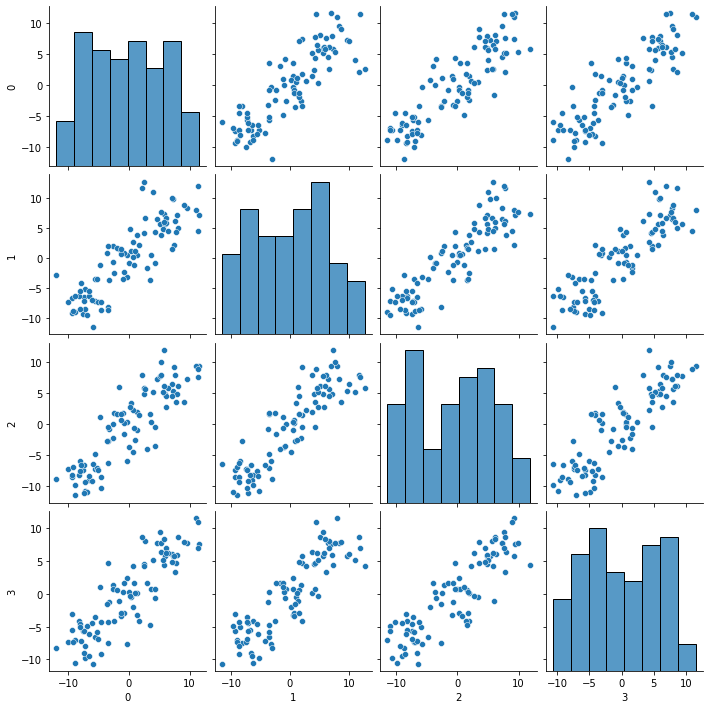

In [3]:
# Построение четырехмерного эпюра для сгенерированных данных.
sns.pairplot(pd.DataFrame(blob_X));

Однако, если подобрать правильную проекцию для отображаемых данных, то сразу станет видно, что сгенерированные сферы не пересекаются (или почти не пересекаются).

### Метод главных компонент (PCA)

Подберем такую проекцию при помощи <a href="https://habr.com/post/304214/">метода главных компонент</a> (<i>PCA, Principle Component Analysis, <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html"> документация</a></i>, можно немного потрогать руками <a href="https://setosa.io/ev/principal-component-analysis/">здесь</a>, с большим количеством математики метод описывается на <a href="http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82">machinelearning.ru</a>). Метод основывается на применении сингулярного разложения матриц (SVD). Его суть состоит в том, что мы преобразуем пространство в новое, имеющее меньшую размерность, и строим проекцию на него. Для этого находится новая ось, вдоль которой относительная дисперсия наших данных максимальна. Далее строится проекция всех точек на эту ось, а полученные значения становятся первой координатой в новом пространстве. Это направление отбрасывается, после чего можно снова попытаться найти еще одну ось, еще одну и т.д. Операцию можно повторить столько раз, сколько измерений должно быть в новом пространстве.

![](img/correlated_2d.png)

По умолчанию PCA строит преставление пространства той же размерности, что и входные данные, однако сортирует измерения по "важности".<br>
При помощи функции fit_transform мы настраиваем коэффициенты преобразования (fit) и преобразуем переданные точки (transform). Каждое из этих действий для PCA можно производить по отдельности.<br>

In [20]:
from sklearn.decomposition import PCA

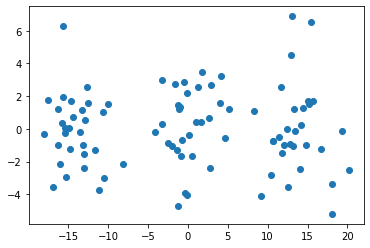

In [5]:
# Создаем объект для преобразования при помощи PCA, 
# он будет преобразовывать в двумерное пространство.
pca_obj = PCA(n_components=2) 
# Настраиваемся на точки, изменяя систему координат, и одновременно
# преобразуем их координаты в два измерения.
show_reduced = pca_obj.fit_transform(blob_X)
# Рисуем точки в преобразованных координатах.
plt.scatter(x=[d[0] for d in show_reduced], 
            y=[d[1] for d in show_reduced]);

Добавим новые точки и сразу преобразуем их в полученное пространство меньшей размерности.

Плюсом метода PCA является тот факт, что после нахождения осей в новое пространство можно преобразовать любую точку исходного пространства. Это возможно, так как преобразование сводится к повороту, масштабированию и проекции.

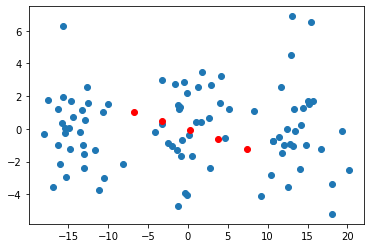

In [6]:
# Генерируем новые точки.
new_points = [(2*i, i, 3*i, i) for i in range(-2, 3)]
# Проецируем их в имеющееся двумерное пространство.
new_2d = pca_obj.transform(new_points)
# Рисуем старые точки.
plt.scatter(x=[d[0] for d in show_reduced], 
                 y=[d[1] for d in show_reduced]);
# Рисуем новые точки.
plt.scatter(x=[d[0] for d in new_2d], 
            y=[d[1] for d in new_2d], 
            c='r');

Можно посмотреть куда "смотрят" новые оси в исходном пространстве.

In [7]:
# Координаты осей в исходном пространстве.
pca_obj.components_

array([[ 0.49230642,  0.50256462,  0.52324478,  0.4809138 ],
       [-0.73737863,  0.66718989,  0.09504508, -0.04579125]])

In [8]:
# Насколько данная координата "объясняет" изменение значений.
pca_obj.explained_variance_ratio_

array([0.90363366, 0.0378258 ])

### Метод t-SNE

Еще одним методом является t-SNE (<i>t-distributed stochastic neighbor embedding</i>). В отличие от предыдущих двух методов, он не строит проекции, а пытается "вдавить" точки в пространство заданной размерности, соблюдая при этом примерное расположение точек. Очевидно, полностью сохранить расположение получается не всегда, но алгоритм старается сделать так, чтобы соседние точки остались соседними.

Примерно такая же картина в смысле разрывов и искажений наблюдается при применении методов наподобие t-SNE. Для разных начальных расположений точек будет получаться разная картина для искажений. Что-то похожее происходит, когда мы рисуем плоскую карту Земли по трехмерному глобусу. При построении такой проекции мы тоже пытаеммся снизить размерность трехмерной фигуры до двух измерений. При этом могут использоваться искажения, то есть мы будем сжимать и растягивать карту. При этом могут возникать разрывы в разных местах. В любом случае, точки, которые были рядом (например, по границе карты) оказываются разнесены друг от друга.

Следует иметь в виду, что в зависимости от того, какую мы выбираем начальную инициализацию, результат может отличаться.

<img src="img/scale_1200.webp" width="400">
<img src="img/675px-Goode_homolosine_projection_SW.jpg" width="400">
<img src="img/0c41ef6a88a84deaaccf18ae2a5862cd.jpg" width="400">
<img src="img/728x728_1_c8e398fc8b09167c72d137f7a7fed660@798x798_0xac120003_3215217821597054271.jpg" width="400">
Больше примеров проекций см. <a href = "https://xkcd.com/977/">здесь</a>.



In [9]:
from sklearn.manifold import TSNE

/home/edward/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/edward/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


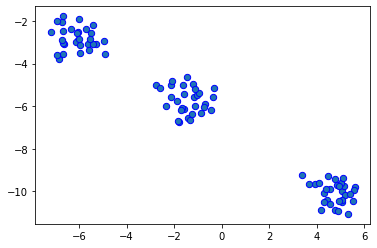

In [10]:
tsne=TSNE()
show_reduced = tsne.fit_transform(blob_X)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()


Простое и понятное объяснение, а также визуализацию результатов можно найти [здесь](https://distill.pub/2016/misread-tsne/).

На самом деле, t-SNE случайным образом разбрасывает точки по пространству нужной размерности, а потом проводит оптимизацию функционала взаимодействия между точками. ([Видео с объяснениями](https://www.youtube.com/watch?v=NEaUSP4YerM))

Визуализация работы t-SNE [здесь](https://distill.pub/2016/misread-tsne/).

#### Доморощенная демка, показывающая как проходит оптимизация точек в пространстве

Ниже приводится моделирование расположения случайных точек, для которых известны их расстояния в многомерном пространстве. При генерации данных они случайным образом распологаются на плоскости. Далее алгоритм сдвигает их так, чтобы улучить взаимное расположение и сделать его более похожим на исходное.

In [1]:
# Этот код предназначен для того, чтобы посмотреть как движутся точки.
# Этот код не предназначен для того, чтобы в нем копаться с целью понять, как работать с t-SNE!!!

from aux_code.model_springs import *
from ipywidgets import Button, interact, interactive_output, HBox, VBox, Layout, \
                       Output, FloatSlider, IntSlider, Checkbox, Select
from IPython.display import display

import numpy as np

In [2]:
# Глобальные переменные: номер шага, матрица расстояний в исходном пространстве, 
# позиции точек в двумерном пространстве, количество точек.
step_no = 1
dist_matrix = None
positions = None
point_count = 50



In [6]:
out = Output(layout=Layout(height='400px', width = '600px', border='solid'))
ax = plt.gca()

buttonGen = Button(description='Generate')
buttonStep = Button(description='Step')
vbox = VBox(children=(buttonGen, buttonStep,))
hbox = HBox(children=(out, vbox))
display(hbox)
with out:
    out.clear_output(wait=True)

buttonGen.on_click(generate)
buttonStep.on_click(moveAndDrawPoints2)

init_globals(dist_matrix, positions, point_count, step_no, ax, out)
generate(None)
for i in range(100):
    moveAndDrawPoints2(1)


### Алгоритм UMAP

Это самый свежий алгоритм, он появился в 2018 году - UMAP (<i>Uniform Manifold Approximation and Projection</i>). Принцип работы аналогичен t-SNE. Посмотрим и на его результаты.

Визуализация работы и объяснение практических моментов [здесь](https://pair-code.github.io/understanding-umap/).

<b>Внимание!!!</b>

Для установки используйте umap-learn (https://pypi.org/project/umap-learn/)<br>
Его интерфейс отличается от библиотеки umap.

`pip install umap-learn`

А еще текущая версия библиотеки требует более старой версии numpy, так что надо переставить библиотеку и всё заработает.

In [165]:
import umap

2025-05-09 17:21:00.630070: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-09 17:21:00.886103: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
umap_emb = umap.UMAP()
show_reduced = umap_emb.fit_transform(blob_X)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()


Теперь посмотрим что сделают эти преобразования с сеткой.

In [16]:
grid_coord = np.array(np.meshgrid(np.arange(10), np.arange(10), np.arange(10), np.arange(10))).T.reshape(-1,4)

Ниже специально приведены значения времени, которое потреовалось для расчета. Вы можете оценить, стоит ли запускать, или можно просто посмотреть на результат.

In [17]:
%%time
show_reduced = PCA().fit_transform(grid_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

CPU times: user 95 ms, sys: 95.4 ms, total: 190 ms
Wall time: 73.3 ms


/home/edward/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/edward/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


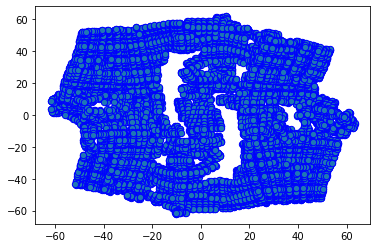

CPU times: user 2min 47s, sys: 296 ms, total: 2min 47s
Wall time: 22.7 s


In [18]:
%%time
show_reduced = tsne.fit_transform(grid_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

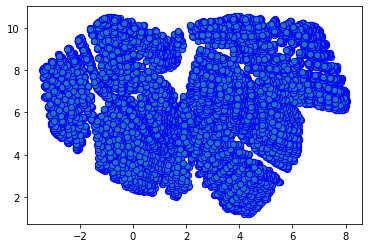

CPU times: user 1min 7s, sys: 1.51 s, total: 1min 8s
Wall time: 18 s


In [19]:
%%time
show_reduced = umap_emb.fit_transform(grid_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

Теперь посмотрим на классику - ирисы Фишера.

In [20]:
from sklearn.datasets import load_iris

In [21]:
iris = sns.load_dataset('iris')

In [22]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

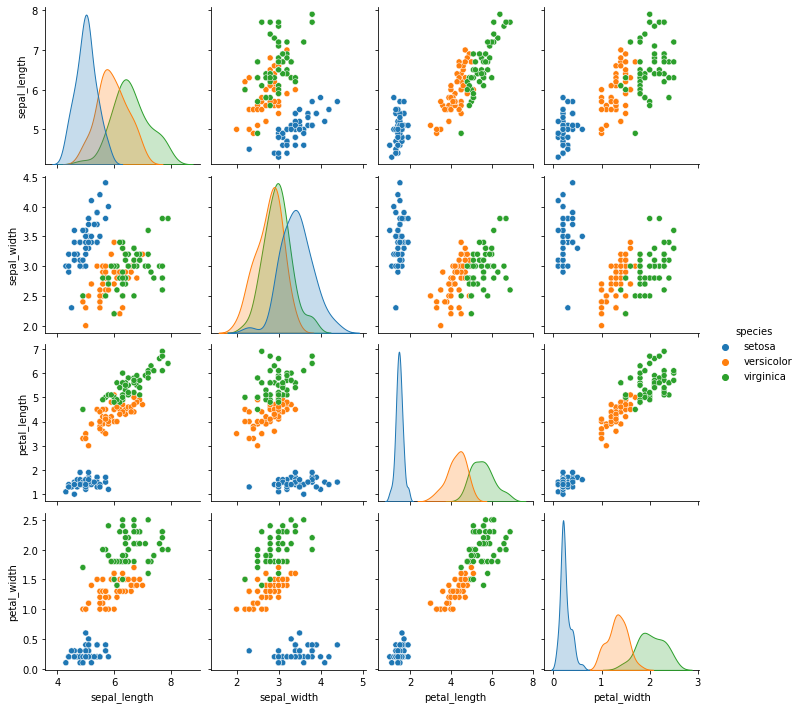

In [23]:
sns.pairplot(iris, hue='species');

In [24]:
X = iris.iloc[:, :4].values

mapping = dict((s, i) for i, s in enumerate(iris.species.unique()))
y = iris.species.replace(mapping).values

X.shape

(150, 4)

### Задание

Отобразите ирисы Фишера при помощи методов PCA, t-SNE и UMAP.

Рассмотренные методы обладают следующими достоинствами и недостатками.
- PCA 
    * быстрый (+);
    * повторяющиеся результаты (+);
    * можно добавить новые точки (+);
    * строит проекцию, то есть часть данных теряется (-).
- t-SNE и UMAP 
    * стараются сохранить расстояния между точками (+);
    * это достигается за счет нелинейных искажений (+-);
    * медленнее PCA (-);
    * а текущий момент добавление новых точек возможно только для реализаций UMAP.
    

## Немного чудес со снижением размерности пространства признаков

Посмотрим насколько применение UMAP может улучшить классификацию. 

Возьмем набор данных с рукописными цифрами. Каждая цифра представляет собой картинку 8х8 пикселей, то есть вектор из 64 элементов. 

In [1]:
# Загружаем набор данных.
from sklearn.datasets import load_digits

digits = load_digits()

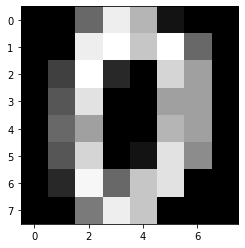

In [14]:
# Посмотрим на одну картинку.
img = digits.images
plt.imshow(img[0], cmap=plt.cm.Greys_r);

In [15]:
# Размер изображения. Само изображение хранится как массив numpy.
img[0].shape

(8, 8)

In [16]:
# Правращаем картинки в вектора.
X = img.reshape(-1, 64)

In [17]:
X.shape

(1797, 64)

In [18]:
# Отделим целевую переменную.
y = digits.target

In [21]:
# Преобразуем координаты при помощи проекции - PCA.
pca2d = PCA(n_components=2)
show_reduced = pca2d.fit_transform(X)


In [22]:
len(show_reduced)

1797

Отобразим полученные проекции. Каждой целевой переменной на графике соответствует свой цвет.

In [23]:
fig, ax = plt.subplots()
ax.scatter([x[0] for x in show_reduced], [x[1] for x in show_reduced], c=y,
           cmap=plt.cm.jet, s=4)
plt.show()

In [24]:
# Сделаем преобразование при помощи UMAP.
umap2d=umap.UMAP(n_components=3)
show_reduced = umap2d.fit_transform(X)


И, о чудо!, цифры разделились!

In [25]:
fig, ax = plt.subplots()
ax.scatter([x[0] for x in show_reduced], [x[1] for x in show_reduced], c=y,
           cmap=plt.cm.jet, s=4)
plt.show()

### Некоторые выводы

Рассмотренные методы позволяют проводить следующие действия:
- визуализировать многомерные данные в ходе предварительного анализа, визуализация позволяет прийти к преварительным выводам о возмоности или невозможности применения разных методов анализа;
- снизить размерность анализируемых данных и получить выигрыш в скорости обработки;
- точность анализа после преобразования пространства может как снизиться, так и увеличиться в зависимости от природы данных;
- методы t-SNE и UMAP позволяют работать с предварительно рассчитанными матрицами расстояниями между точками, за счет этого можно преобразовать неметрическое пространство в метрическое.

## Снижение размерности пространства признаков для текстов

Теперь посмотрим каким образом мы можем отобразить векторизованные тексты при помощи новых методов.

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import plotly.graph_objects as go


In [159]:
with open("data/lenta2018.txt", encoding="utf-8") as news_file: # Файл с новостями.
    text_news = [n.split("-----\n")[1] for n in news_file.read().split("=====\n")[1:]]
    

In [162]:
cvct = TfidfVectorizer(token_pattern="[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+|[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+|[а-яёА-ЯЁ]+", 
                       ngram_range=(1, 2))

In [163]:
tfidf_res = cvct.fit_transform(text_news)

In [166]:
umap_text = umap.UMAP(n_components=2)
text_reduced = umap_text.fit_transform(tfidf_res)

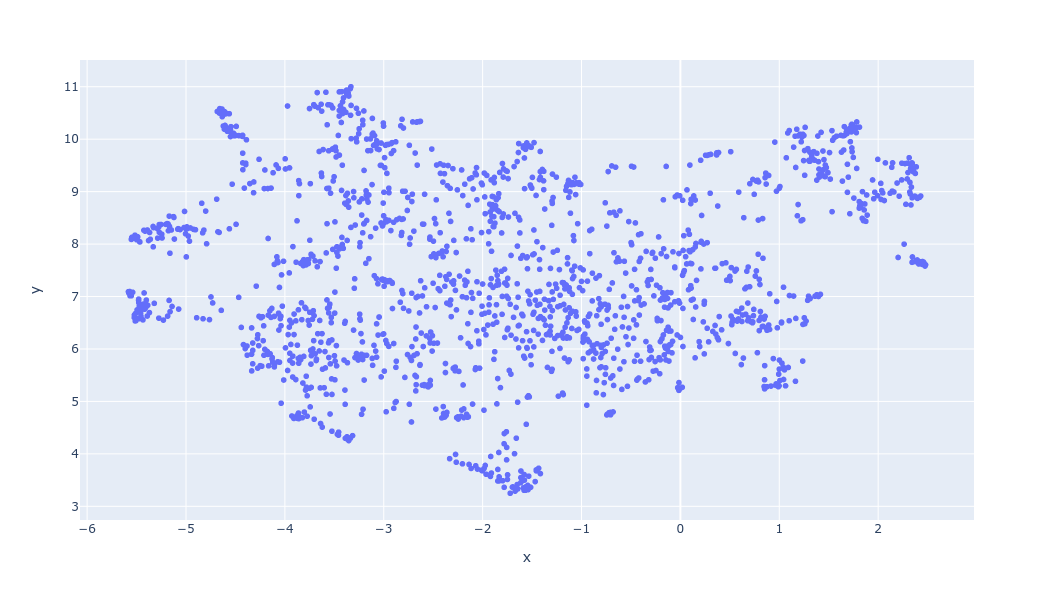

In [197]:
fig= px.scatter(x=text_reduced[:, 0], y=text_reduced[:, 1], height=600, hover_name=[n[:100] for n in text_news])
fig.show()

In [183]:
center = np.array([-5.4, 6.8])
texts_group = [i for i, pt in enumerate(text_reduced) if np.linalg.norm(center-pt)<0.3]

In [184]:
[text_news[i][:100] for i in texts_group]

['Ракета-носитель «Союз-2.1а» с 11 спутниками стартовала с космодрома Восточный. Об этом сообщает Косм',
 'Британская компания Skyrora, научно-исследовательский центр которой расположен в украинском Днепре (',
 'Основатель SpaceX и сооснователь Tesla Илон Маск решил переименовать свои огнеметы в «неогнеметы». О',
 'В Японии запустили самую маленькую в мире ракету-носитель SS-520 весом всего в три тонны Об этом в с',
 'НАСА опубликовало панорамное видео с Марса, снятое аппаратом Curiosity. В кадр попали все знаковые м',
 'Бывший журналист ТАСС Валентин Уваров, в 2014-2016 годы занимавший должность директора департамента ',
 'Частная американская компания SpaceX выложила в сеть анимацию старта сверхтяжелой ракеты Falcon Heav',
 'Глава американской компании SpaceX Илон Маск раскрыл планы на будущее сверхтяжелой ракеты-носителя F',
 'SpaceX провела первый запуск сверхтяжелой ракеты-носителя Falcon Heavy. Трансляция велась на YouTube',
 'SpaceX, запустившая сверхтяжелую ракету Falcon Heavy,

In [185]:
umap_text3 = umap.UMAP(n_components=3)
text_reduced3 = umap_text3.fit_transform(tfidf_res)

In [200]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=text_reduced3[:, 0], y=text_reduced3[:, 1], z=text_reduced3[:, 2],
    hovertext=[n[:80] for n in text_news],
    mode="markers",
    marker=dict(line=dict(width=0), size=2, 
               ),
    opacity=0.5
))

fig.update_layout(width=800, height=600)
fig.show()


In [202]:
center3 = np.array([-2., 5., 7.])
texts_group3 = [i for i, pt in enumerate(text_reduced3) if np.linalg.norm(center3-pt)<0.5]
[text_news[i][:100] for i in texts_group3]

['Международная группа ученых под руководством испанского университета Гранады выяснила, что долгосроч',
 'Международная группа ученых из Великобритании и Германии идентифицировала 24 новых препарата, которы',
 'Китайские исследователи в ходе эксперимента пересадили пятерым детям уши, выращенные из их собственн',
 'Ученые Стэнфордского университета смогли устранить опухолевые клетки у мышей, страдающих от неизлечи',
 'Биологи МГУ открыли «молекулярный таймер» — особый механизм регуляции синтеза белка, который предотв',
 'Британцы перестали посещать солярии из страха выглядеть, как президент США Дональд Трамп. Результаты',
 'Ученые Витватерсрандского университета в Йоханнесбурге расшифровали геном одной из простейших многок',
 'Усиление активности белков, удлиняющих теломеры, связано с ускорением старения, а не его замедлением',
 'Всемирная организация здравоохранения (ВОЗ) сообщила о связи употребления алкоголя и различных онкол',
 'Ученые Университета Данди в Шотландии выяснили, что п

In [198]:
umap_text3 = umap.UMAP(n_neighbors=15, n_components=3)
text_reduced3 = umap_text3.fit_transform(tfidf_res)

In [199]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=text_reduced3[:, 0], y=text_reduced3[:, 1], z=text_reduced3[:, 2],
    hovertext=[n[:100] for n in text_news],
    mode="markers",
    marker=dict(line=dict(width=0), size=2, 
               ),
    opacity=0.5
))

fig.update_layout(width=800, height=600)
fig.show()


In [203]:
center3 = np.array([-2., 5., 7])
texts_group3 = [i for i, pt in enumerate(text_reduced3) if np.linalg.norm(center3-pt)<1]
[text_news[i][:100] for i in texts_group3]

['Международная группа ученых под руководством испанского университета Гранады выяснила, что долгосроч',
 'Международная группа ученых из Великобритании и Германии идентифицировала 24 новых препарата, которы',
 'Ученые из Южной Кореи, Франции и Индии под руководством российского физика Алексея Старобинского реш',
 'Международная группа ученых под руководством Фолькера Спрингера из Института теоретических исследова',
 'Китайские исследователи в ходе эксперимента пересадили пятерым детям уши, выращенные из их собственн',
 'Ученые заявили о возможном скором перевороте магнитных полюсов Земли, а также последующих за этим ка',
 'Ученые Стэнфордского университета смогли устранить опухолевые клетки у мышей, страдающих от неизлечи',
 'Американские ученые из Рочестерского университета выяснили, что употребление небольшого количества а',
 'Специалисты НАСА подтвердили существование в атмосфере Титана винилцианида — соединения, которое мож',
 'Биологи МГУ открыли «молекулярный таймер» — особый ме